In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from scipy.stats import spearmanr

def main():
    data: DataFrame = pd.read_csv('data/Group18Data.csv')
    customPlot(data,'Thread Count')
    customPlot(data,'Elements', 16)
    customPlot(data,'Elements', 8)
    customPlot(data,'Elements', 1)
    return data

def customPlot(data: DataFrame, across: str, threads = 32):

    threadCount: str = 'Thread Count'
    elements: str = 'Elements'
    algorithm: str = 'Algorithm'
    time: str = 'Time'

    if threadCount == across:
        data = data[data[elements] == max(data[elements])]
        X = data[[algorithm,threadCount,time]]
    else:
        data = data[data[threadCount] == threads]
        X =data[[algorithm,elements,time]]
    
    customcmap = ["red", "blue", "green","grey","orange","purple"]
    
    fig, axis = plot.subplots(figsize=(8, 6))
    algorithmNames = np.unique(X[algorithm])

    for i in range(len(algorithmNames)):
        algoData = X[X[algorithm] == algorithmNames[i]].groupby(across).mean(numeric_only=True).reset_index()
        x = np.array(algoData[across])
        y = np.array(algoData[time])
        
        plot.plot(x, y,label=str(algorithmNames[i]), marker='o', color=customcmap[i])
        
        #Spearman correlation
        if across == 'Thread Count':
            coef, p = spearmanr(x, y)
            print("Spearman correlation:", algorithmNames[i], coef)
        if across == 'Elements':
            plot.title(f'Runtime vs Element count for {threads} threads')
        
    plot.legend(loc='best')
    axis.set_xlabel(across, fontsize=20)
    axis.set_ylabel(r'Time (s)', fontsize=20)
    if(across == threadCount):
        plot.savefig('graphs/' + across +'.png')
    else:
        plot.savefig('graphs/' + across + '_' + str(threads) +'.png')

Spearman correlation: Bitonic Sort -0.9757575757575757
Spearman correlation: MergeSort -0.9151515151515152
Spearman correlation: QuickSort 0.05454545454545454
Spearman correlation: Sample Sort -0.13939393939393938
Spearman correlation: TimSort -0.5151515151515151


,Algorithm,Implementation,Thread Count,Elements,Time
0,TimSort,OpenMP,1,32768,0.002232
1,TimSort,OpenMP,2,32768,0.001361
2,TimSort,OpenMP,3,32768,0.001541
3,TimSort,OpenMP,4,32768,0.001539
4,TimSort,OpenMP,5,32768,0.001245
...,...,...,...,...,...
6045,Sample Sort,OpenMP,6,134217728,31.872606
6046,Sample Sort,OpenMP,7,134217728,28.141532
6047,Sample Sort,OpenMP,8,134217728,27.677976
6048,Sample Sort,OpenMP,16,134217728,28.238696


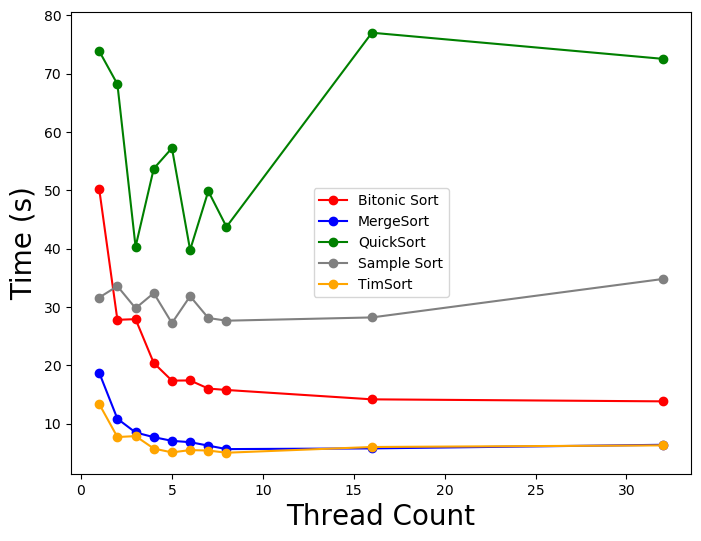

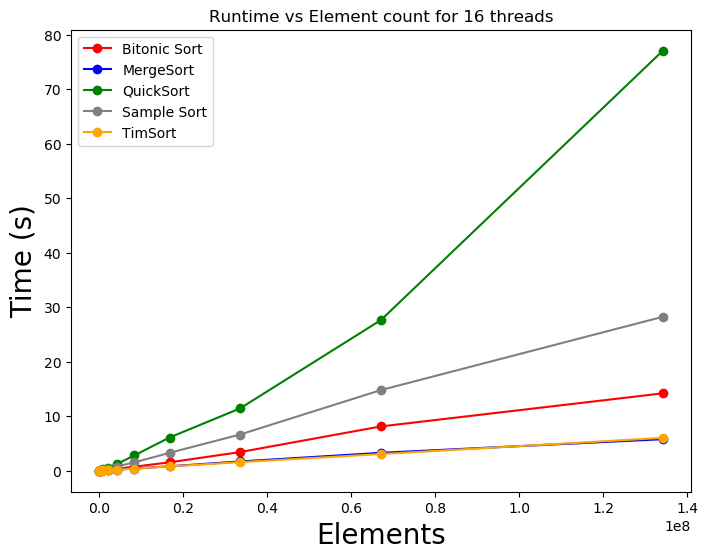

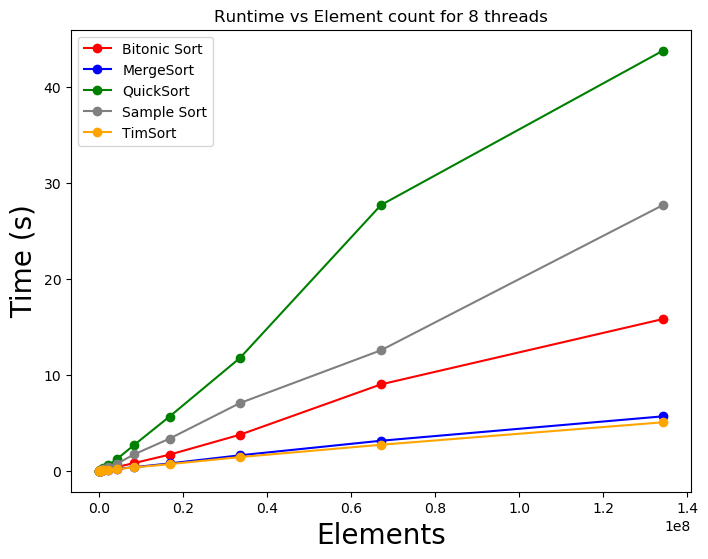

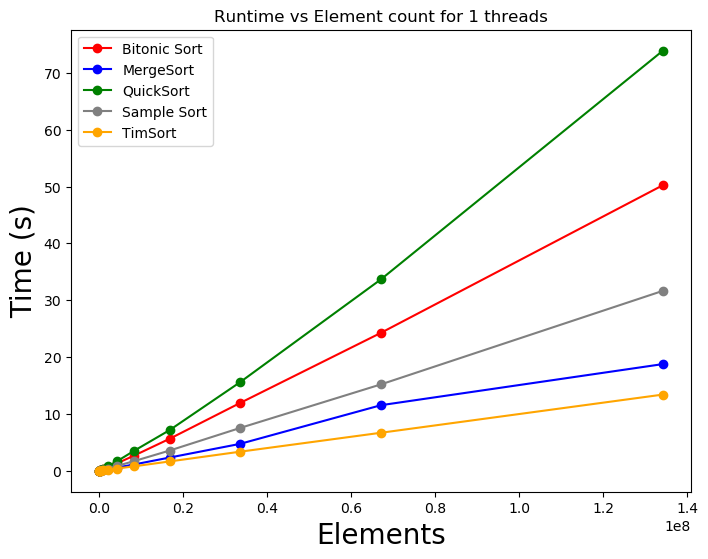

In [3]:
main()